# Advanced NumPy
- references: http://cs231n.github.io/python-numpy-tutorial/, https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Image as arrays
- Images can be intepreted as a 4D or 3D array

In [5]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype = np.float32)
print(image.shape)

(1, 3, 3, 1)


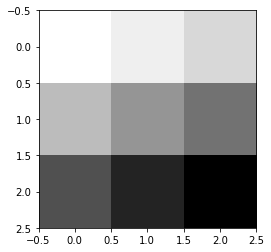

In [6]:
plt.imshow(image.reshape(3,3), cmap = 'Greys')

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
img = mnist.train.images[0]
img.shape    # original data with shape (784, )

(784,)

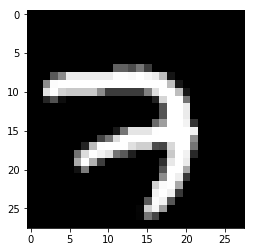

In [5]:
img = img.reshape(28, 28)
plt.imshow(img, cmap = 'gray')

## Broadcasting
- Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations
- Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array

Suppose we want to add a constant vector to each row of a matrix

In [6]:
x = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
v = np.array([1,0,1])
y = np.empty_like(x)

In [7]:
print(x.shape)
print(v.shape)
print(y.shape)

(4, 3)
(3,)
(4, 3)


We want to add v to all rows of **x**
- one of the simple ways is to use an explicit for loop

In [8]:
for i in range(4):
    y[i, :] = x[i, :] + v

In [9]:
y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

However, when x is very large, performing an explicit loop in Python is too slow
- Another way of doing this is to stack the matrix v 4 times and add it to x

In [10]:
x = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
v = np.array([1,0,1])
vv = np.tile(v, (4,1))

In [12]:
print(vv.shape)

(4, 3)


In [13]:
y = x + vv

In [14]:
y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

NumPy broadcasting allows us to perform this computation **without actually creating multiple copies of v**

In [15]:
x = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
v = np.array([1,0,1])

In [16]:
y = x + v

In [17]:
y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

### Broadcasting rules for two arrays
- If all input arrays do not have the same number of dimensions (i.e. ranks), a "1" will be repeatedly prepended to the shapes of the smaller arrays until all the arrays have the same number of dimensions
- Arrays with a size of 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is assumed to be the same along that dimension for the "broadcast" array
- After application of the broadcasting rules, the sizes of all arrays must match

In [18]:
v = np.array([1,2,3])
w = np.array([4,5])

In [19]:
print(v.shape)
print(w.shape)

(3,)
(2,)


In [21]:
np.reshape(v, (3,1))

array([[1],
       [2],
       [3]])

In [20]:
print(np.reshape(v, (3,1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [22]:
x = np.array([[1,2,3],[4,5,6]])

In [23]:
print(x.shape)

(2, 3)


In [24]:
print(x + v)

[[2 4 6]
 [5 7 9]]


In [25]:
x.T.shape

(3, 2)

In [27]:
print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]
